# Universidad Politecnica de San Luis Potosí
## Mendoza Monreal Jose Israel - 173389
### Mineria de datos 10/04/2023
#### Algoritmo KNN
##### Clasificacion de psiss con KNN
---



Se cargan las librias pandas, numpy e seaborn

In [ ]:
import pandas as ps
import numpy as np
import seaborn as sb

Posteriormente se importan confusion_matrix y classification_report de sklearn.metrics, para KNN se importa KNeighborsClassifier de sklearn.neighbors y StandardScaler de preprocessing para estandarizar variables

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

La funcion read_csv permite leer un archivo csv en python

In [ ]:
datos = ps.read_csv('/content/rezagoslp (1).csv', delimiter=";")

Se muestran los datos en la variable 'datos'

In [ ]:
datos

Municipio Poblacion  p15a  p6a14noe  p15ymbin  psiss  \
0                     Ahualulco    18,974   8.0       5.2      39.7   20.1   
1                     Alaquines     7,785  11.2       5.0      50.4   15.0   
2      Armadillo de los Infante     4,013  10.4      16.8      57.4   14.6   
3                      Cárdenas    18,317   5.7       5.6      35.1   23.4   
4                       Catorce     9,579  10.1       6.4      42.6   10.4   
5                        Cedral    19,840   6.0       3.6      33.7   13.9   
6                      Cerritos    22,075   5.4       4.7      38.1   21.0   
7               Ciudad del Maíz    30,320   7.4       5.4      43.1   13.8   
8              Ciudad Fernández    48,106   5.7       5.1      35.1   18.5   
9                   Tancanhuitz    20,300   7.8       2.4      36.7   22.7   
10                Ciudad Valles   179,371   4.2       3.3      24.9   19.5   
11                    Coxcatlán    15,660   9.4       2.9      40.9   14.0   
12                      Charcas    21,814   6.7       5.6      34.7   15.5   
13                  Guadalcázar    25,119  11.6       6.2      53.2   17.8   
14                   Huehuetlán    15,334   9.0       3.4      38.7   16.7   
15                   Lagunillas     5,453  14.3       6.7      53.4   11.6   
16                    Matehuala   102,199   3.6       3.9      26.9   16.3   
17         Mexquitic de Carmona    58,469   5.9       4.6      34.4   26.6   
18                    Moctezuma    19,036   9.1       5.1      47.1   21.6   
19                        Rayón    15,301   9.7       4.9      47.8   19.9   
20                     Rioverde    97,943   6.8       5.1      35.8   20.6   
21                      Salinas    31,107   5.1       5.1      42.0   19.8   
22                  San Antonio     9,382  10.1       2.4      38.9   13.1   
23           San Ciro de Acosta    10,215   9.3       7.2      46.6   17.1   
24              San Luis Potosí   911,908   1.8       4.9      18.6   17.5   
25    San Martín Chalchicuautla    18,468  16.0       3.0      43.3    8.8   
26        San Nicolás Tolentino     4,779  11.8       7.0      54.3   18.4   
27               Santa Catarina    12,163  21.7       8.1      60.7    6.4   
28          Santa María del Río    39,880   7.8       7.6      42.4   17.5   
29                Santo Domingo    10,785  10.4       9.3      57.4   20.2   
30      San Vicente Tancuayalab    14,945   8.7       3.7      37.0   16.9   
31  Soledad de Graciano Sánchez   332,072   1.8       4.2      19.1   16.6   
32                 Tamazunchale    95,037  10.9       4.5      37.1   18.0   
33                     Tampacán    14,348  10.1       3.3      33.6    7.8   
34            Tampamolón Corona    13,603  11.5       2.9      40.1   13.0   
35                       Tamuín    36,968   6.6       3.5      35.3   15.6   
36                     Tanlajás    18,208   8.9       3.2      37.1   14.7   
37         Tanquián de Escobedo    13,448   9.6       3.0      34.3   23.6   
38                 Tierra Nueva     7,966  12.0       6.6      49.8   20.7   
39                      Vanegas     7,557   7.5       5.9      44.0   14.5   
40                       Venado    14,188   8.8       3.6      43.5   26.2   
41             Villa de Arriaga    18,206   7.1       6.4      46.7   16.4   
42           Villa de Guadalupe     9,277  11.9       4.8      53.5   16.2   
43              Villa de la Paz     5,298   5.7       2.7      32.7    8.7   
44               Villa de Ramos    38,389   8.4       7.3      54.3   14.2   
45               Villa de Reyes    52,912   6.6       4.9      40.7   16.6   
46                Villa Hidalgo    15,458   7.1       4.7      42.3   19.6   
47                 Villa Juárez    10,304  10.5       4.8      52.7   11.7   
48            Axtla de Terrazas    32,544   6.6       2.8      33.7   13.1   
49                      Xilitla    49,741   7.3       3.8      37.3   10.5   
50                     Zaragoza    27,386  1

Para quitar los datos con NaN realizamos la siguiente funcion

In [ ]:
datos = datos.dropna()

In [ ]:
datos

Municipio Poblacion  p15a  p6a14noe  p15ymbin  psiss  \
0                     Ahualulco    18,974   8.0       5.2      39.7   20.1   
1                     Alaquines     7,785  11.2       5.0      50.4   15.0   
2      Armadillo de los Infante     4,013  10.4      16.8      57.4   14.6   
3                      Cárdenas    18,317   5.7       5.6      35.1   23.4   
4                       Catorce     9,579  10.1       6.4      42.6   10.4   
5                        Cedral    19,840   6.0       3.6      33.7   13.9   
6                      Cerritos    22,075   5.4       4.7      38.1   21.0   
7               Ciudad del Maíz    30,320   7.4       5.4      43.1   13.8   
8              Ciudad Fernández    48,106   5.7       5.1      35.1   18.5   
9                   Tancanhuitz    20,300   7.8       2.4      36.7   22.7   
10                Ciudad Valles   179,371   4.2       3.3      24.9   19.5   
11                    Coxcatlán    15,660   9.4       2.9      40.9   14.0   
12                      Charcas    21,814   6.7       5.6      34.7   15.5   
13                  Guadalcázar    25,119  11.6       6.2      53.2   17.8   
14                   Huehuetlán    15,334   9.0       3.4      38.7   16.7   
15                   Lagunillas     5,453  14.3       6.7      53.4   11.6   
16                    Matehuala   102,199   3.6       3.9      26.9   16.3   
17         Mexquitic de Carmona    58,469   5.9       4.6      34.4   26.6   
18                    Moctezuma    19,036   9.1       5.1      47.1   21.6   
19                        Rayón    15,301   9.7       4.9      47.8   19.9   
20                     Rioverde    97,943   6.8       5.1      35.8   20.6   
21                      Salinas    31,107   5.1       5.1      42.0   19.8   
22                  San Antonio     9,382  10.1       2.4      38.9   13.1   
23           San Ciro de Acosta    10,215   9.3       7.2      46.6   17.1   
24              San Luis Potosí   911,908   1.8       4.9      18.6   17.5   
25    San Martín Chalchicuautla    18,468  16.0       3.0      43.3    8.8   
26        San Nicolás Tolentino     4,779  11.8       7.0      54.3   18.4   
27               Santa Catarina    12,163  21.7       8.1      60.7    6.4   
28          Santa María del Río    39,880   7.8       7.6      42.4   17.5   
29                Santo Domingo    10,785  10.4       9.3      57.4   20.2   
30      San Vicente Tancuayalab    14,945   8.7       3.7      37.0   16.9   
31  Soledad de Graciano Sánchez   332,072   1.8       4.2      19.1   16.6   
32                 Tamazunchale    95,037  10.9       4.5      37.1   18.0   
33                     Tampacán    14,348  10.1       3.3      33.6    7.8   
34            Tampamolón Corona    13,603  11.5       2.9      40.1   13.0   
35                       Tamuín    36,968   6.6       3.5      35.3   15.6   
36                     Tanlajás    18,208   8.9       3.2      37.1   14.7   
37         Tanquián de Escobedo    13,448   9.6       3.0      34.3   23.6   
38                 Tierra Nueva     7,966  12.0       6.6      49.8   20.7   
39                      Vanegas     7,557   7.5       5.9      44.0   14.5   
40                       Venado    14,188   8.8       3.6      43.5   26.2   
41             Villa de Arriaga    18,206   7.1       6.4      46.7   16.4   
42           Villa de Guadalupe     9,277  11.9       4.8      53.5   16.2   
43              Villa de la Paz     5,298   5.7       2.7      32.7    8.7   
44               Villa de Ramos    38,389   8.4       7.3      54.3   14.2   
45               Villa de Reyes    52,912   6.6       4.9      40.7   16.6   
46                Villa Hidalgo    15,458   7.1       4.7      42.3   19.6   
47                 Villa Juárez    10,304  10.5       4.8      52.7   11.7   
48            Axtla de Terrazas    32,544   6.6       2.8      33.7   13.1   
49                      Xilitla    49,741   7.3       3.8      37.3   10.5   
50                     Zaragoza    27,386  1

In [ ]:
datos.head(1)

Municipio Poblacion  p15a  p6a14noe  p15ymbin  psiss  vipt  visexsa  \
0  Ahualulco    18,974   8.0       5.2      39.7   20.1   8.4      8.1   

   visagen  visidr  visee  visila  visire Rezago  clasificacion  
0     16.2    11.4    2.7    32.5    14.5   Bajo              2

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Municipio      54 non-null     object 
 1   Poblacion      54 non-null     object 
 2   p15a           54 non-null     float64
 3   p6a14noe       54 non-null     float64
 4   p15ymbin       54 non-null     float64
 5   psiss          54 non-null     float64
 6   vipt           54 non-null     float64
 7   visexsa        54 non-null     float64
 8   visagen        54 non-null     float64
 9   visidr         54 non-null     float64
 10  visee          54 non-null     float64
 11  visila         54 non-null     float64
 12  visire         54 non-null     float64
 13  Rezago         54 non-null     object 
 14  clasificacion  54 non-null     int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 6.5+ KB


Para agrupar los datos por tipo y tamaño se utiliza el siguiente tamaño

In [ ]:
print(datos.groupby('clasificacion').size())

clasificacion
1     7
2    28
3    14
4     4
5     1
dtype: int64


Para visualizar el histograma de la clasificacion se utiliza la siguente tabla

<Axes: >

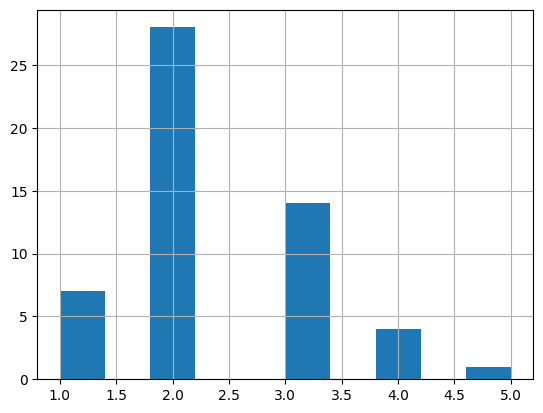

In [ ]:
datos.clasificacion.hist()

El siguiente comando realiza lo mismo pero con diferentes instrucciones y usando seaborn

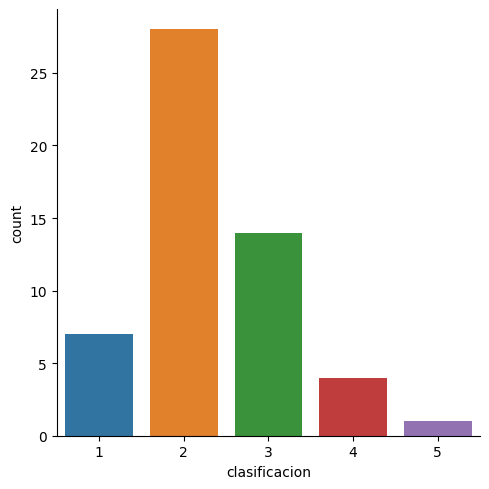

In [ ]:
sb.catplot(x='clasificacion',data=datos, kind="count")

Se importa train_test_split de sklearn.model_selection para divir la informacion para entrenar y para aprender

In [ ]:
from sklearn.model_selection import train_test_split

Definimos el segundo modelo de datos con el cual vamos a comparar y entrar la informacion, omitimos los valores de municipio y poblacion total

In [ ]:
datos2 = datos[['p15a', 'p6a14noe', 'p15ymbin', 'psiss', 'vipt', 'visexsa', 'visagen', 'visidr', 'visee']]
datos2
#Otra manera de hacerlo es con el comando datos2=datos.drop(['Municipio','Poblacion','Rezago'],axis=1)

p15a  p6a14noe  p15ymbin  psiss  vipt  visexsa  visagen  visidr  visee
0    8.0       5.2      39.7   20.1   8.4      8.1     16.2    11.4    2.7
1   11.2       5.0      50.4   15.0   7.2      2.8     28.6    33.7    2.7
2   10.4      16.8      57.4   14.6   3.5      5.2     13.9    14.9    3.3
3    5.7       5.6      35.1   23.4   6.6      1.2      6.9     7.4    1.9
4   10.1       6.4      42.6   10.4   7.5      5.9     19.4    13.5    3.7
5    6.0       3.6      33.7   13.9   2.8      1.9      5.3     3.4    1.1
6    5.4       4.7      38.1   21.0   3.4      0.8      5.1    16.8    1.4
7    7.4       5.4      43.1   13.8   5.6      1.8     17.7    21.2    1.8
8    5.7       5.1      35.1   18.5   6.1      0.9      1.6     3.9    0.9
9    7.8       2.4      36.7   22.7  19.2      2.7     38.9    20.6    6.0
10   4.2       3.3      24.9   19.5   6.1      1.4      3.2     6.0    1.7
11   9.4       2.9      40.9   14.0  12.7      1.9     35.6    49.4    4.2
12   6.7       5.6      34.7   15.5   6.3      2.9     13.9    12.5    3.9
13  11.6       6.2      53.2   17.8   6.9      4.8     50.2    37.2    2.9
14   9.0       3.4      38.7   16.7  15.3      2.0     26.5    25.5    5.8
15  14.3       6.7      53.4   11.6   5.0      3.0     10.8    33.3    2.8
16   3.6       3.9      26.9   16.3   1.5      0.6      6.2     5.8    0.7
17   5.9       4.6      34.4   26.6   3.1     11.1     10.3    15.0    2.1
18   9.1       5.1      47.1   21.6   4.2      6.6      9.0    15.6    2.2
19   9.7       4.9      47.8   19.9   8.2      4.6     19.1    12.0    3.8
20   6.8       5.1      35.8   20.6   8.0      1.4      7.0     7.7    1.7
21   5.1       5.1      42.0   19.8   3.7      4.5      9.4     9.0    1.5
22  10.1       2.4      38.9   13.1  12.2      5.4     22.1    43.5    5.0
23   9.3       7.2      46.6   17.1   6.0      3.2      5.5     7.4    2.2
24   1.8       4.9      18.6   17.5   1.3      0.5      1.6     0.7    0.3
25  16.0       3.0      43.3    8.8  20.0      1.8     36.5    40.4    2.4
26  11.8       7.0      54.3   18.4   3.2      2.5      8.4     4.5    2.5
27  21.7       8.1      60.7    6.4  11.1     11.0     48.5    59.7    8.2
28   7.8       7.6      42.4   17.5   5.9      9.1     13.7    10.9    4.0
29  10.4       9.3      57.4   20.2   4.8      5.3     10.7     7.0    1.2
30   8.7       3.7      37.0   16.9  13.0      1.6     10.3    29.2    2.8
31   1.8       4.2      19.1   16.6   1.0      0.4      0.8     0.4    0.3
32  10.9       4.5      37.1   18.0  13.8      1.7     16.5    18.8    1.8
33  10.1       3.3      33.6    7.8  20.0      2.1     30.1    27.3    2.7
34  11.5       2.9      40.1   13.0  26.0      2.2     11.7    28.2    4.3
35   6.6       3.5      35.3   15.6   9.3      1.4      8.4    14.0    2.3
36   8.9       3.2      37.1   14.7  16.3      5.0      6.1    58.8    4.1
37   9.6       3.0      34.3   23.6   8.2      1.8      4.2    11.2    1.9
38  12.0       6.6      49.8   20.7   6.9      8.5      8.0    11.7    3.5
39   7.5       5.9      44.0   14.5   4.7      2.8     19.6    27.4    1.0
40   8.8       3.6      43.5   26.2   3.3      4.8     11.7     8.3    4.9
41   7.1       6.4      46.7   16.4   3.1     17.0     10.5    25.5    2.2
42  11.9       4.8      53.5   16.2   5.6      3.6     31.5    29.4    2.5
43   5.7       2.7      32.7    8.7   2.1      2.6      2.0     5.7    0.8
44   8.4       7.3      54.3   14.2   3.3      8.3     10.6    11.4    1.0
45   6.6       4.9      40.7   16.6   6.5      6.3      4.2     7.2    1.2
46   7.1       4.7      42.3   19.6   2.4      4.0     11.2    10.1    1.8
47  10.5       4.8      52.7   11.7  11.5      1.6      6.6    28.3    2.4
48   6.6       2.8      33.7   13.1  13.6      1.1      7.1    22.7    1.7
49   7.3       3.8      37.3   10.5  12.7      2.2     33.7    21.1    4.2
50  10.2       5.9      41.2   17.8   6.8      6.4     10.1    10.5    1.3
51  10.3       6.7      44.5   12.8   3.3      3.4      4.9     7.1    1.9
52  11.1       4.0      42.6 

Definimos el nombre de las variables de entrenamiento y de prueba, los datos con los que se entrenara en la variable izquierda, la muestra de prueba y la semilla random a la derecha
Es decir 70% en x train y 30% en x test

In [ ]:
x_train, x_test = train_test_split(datos2, test_size=0.3, random_state=42)

In [ ]:
x_test

p15a  p6a14noe  p15ymbin  psiss  vipt  visexsa  visagen  visidr  visee
19   9.7       4.9      47.8   19.9   8.2      4.6     19.1    12.0    3.8
49   7.3       3.8      37.3   10.5  12.7      2.2     33.7    21.1    4.2
48   6.6       2.8      33.7   13.1  13.6      1.1      7.1    22.7    1.7
12   6.7       5.6      34.7   15.5   6.3      2.9     13.9    12.5    3.9
44   8.4       7.3      54.3   14.2   3.3      8.3     10.6    11.4    1.0
5    6.0       3.6      33.7   13.9   2.8      1.9      5.3     3.4    1.1
17   5.9       4.6      34.4   26.6   3.1     11.1     10.3    15.0    2.1
52  11.1       4.0      42.6    7.9  13.3      1.7     14.0    29.5    1.7
3    5.7       5.6      35.1   23.4   6.6      1.2      6.9     7.4    1.9
32  10.9       4.5      37.1   18.0  13.8      1.7     16.5    18.8    1.8
13  11.6       6.2      53.2   17.8   6.9      4.8     50.2    37.2    2.9
8    5.7       5.1      35.1   18.5   6.1      0.9      1.6     3.9    0.9
26  11.8       7.0      54.3   18.4   3.2      2.5      8.4     4.5    2.5
6    5.4       4.7      38.1   21.0   3.4      0.8      5.1    16.8    1.4
34  11.5       2.9      40.1   13.0  26.0      2.2     11.7    28.2    4.3
4   10.1       6.4      42.6   10.4   7.5      5.9     19.4    13.5    3.7
37   9.6       3.0      34.3   23.6   8.2      1.8      4.2    11.2    1.9

In [ ]:
x_train

p15a  p6a14noe  p15ymbin  psiss  vipt  visexsa  visagen  visidr  visee
24   1.8       4.9      18.6   17.5   1.3      0.5      1.6     0.7    0.3
45   6.6       4.9      40.7   16.6   6.5      6.3      4.2     7.2    1.2
33  10.1       3.3      33.6    7.8  20.0      2.1     30.1    27.3    2.7
50  10.2       5.9      41.2   17.8   6.8      6.4     10.1    10.5    1.3
15  14.3       6.7      53.4   11.6   5.0      3.0     10.8    33.3    2.8
9    7.8       2.4      36.7   22.7  19.2      2.7     38.9    20.6    6.0
16   3.6       3.9      26.9   16.3   1.5      0.6      6.2     5.8    0.7
30   8.7       3.7      37.0   16.9  13.0      1.6     10.3    29.2    2.8
36   8.9       3.2      37.1   14.7  16.3      5.0      6.1    58.8    4.1
25  16.0       3.0      43.3    8.8  20.0      1.8     36.5    40.4    2.4
11   9.4       2.9      40.9   14.0  12.7      1.9     35.6    49.4    4.2
0    8.0       5.2      39.7   20.1   8.4      8.1     16.2    11.4    2.7
47  10.5       4.8      52.7   11.7  11.5      1.6      6.6    28.3    2.4
27  21.7       8.1      60.7    6.4  11.1     11.0     48.5    59.7    8.2
31   1.8       4.2      19.1   16.6   1.0      0.4      0.8     0.4    0.3
40   8.8       3.6      43.5   26.2   3.3      4.8     11.7     8.3    4.9
29  10.4       9.3      57.4   20.2   4.8      5.3     10.7     7.0    1.2
46   7.1       4.7      42.3   19.6   2.4      4.0     11.2    10.1    1.8
1   11.2       5.0      50.4   15.0   7.2      2.8     28.6    33.7    2.7
21   5.1       5.1      42.0   19.8   3.7      4.5      9.4     9.0    1.5
2   10.4      16.8      57.4   14.6   3.5      5.2     13.9    14.9    3.3
41   7.1       6.4      46.7   16.4   3.1     17.0     10.5    25.5    2.2
39   7.5       5.9      44.0   14.5   4.7      2.8     19.6    27.4    1.0
35   6.6       3.5      35.3   15.6   9.3      1.4      8.4    14.0    2.3
23   9.3       7.2      46.6   17.1   6.0      3.2      5.5     7.4    2.2
43   5.7       2.7      32.7    8.7   2.1      2.6      2.0     5.7    0.8
10   4.2       3.3      24.9   19.5   6.1      1.4      3.2     6.0    1.7
22  10.1       2.4      38.9   13.1  12.2      5.4     22.1    43.5    5.0
18   9.1       5.1      47.1   21.6   4.2      6.6      9.0    15.6    2.2
53   5.3       6.5      37.4   12.7   3.0      1.6      2.2     5.5    1.8
20   6.8       5.1      35.8   20.6   8.0      1.4      7.0     7.7    1.7
7    7.4       5.4      43.1   13.8   5.6      1.8     17.7    21.2    1.8
42  11.9       4.8      53.5   16.2   5.6      3.6     31.5    29.4    2.5
14   9.0       3.4      38.7   16.7  15.3      2.0     26.5    25.5    5.8
28   7.8       7.6      42.4   17.5   5.9      9.1     13.7    10.9    4.0
51  10.3       6.7      44.5   12.8   3.3      3.4      4.9     7.1    1.9
38  12.0       6.6      49.8   20.7   6.9      8.5      8.0    11.7    3.5

Definimos a la variable y train como solamente la informacion de la columna 'psiss' en y_test, hace lo mismo en y_test con la informacion de la columna 'psiss' en x_test

In [ ]:
y_train = x_train['psiss']
y_test = x_test['psiss']

La siguiente linea de codigo elimina la columna 'psiss' de x_train

In [ ]:
x_train = x_train[['p15a', 'p6a14noe', 'p15ymbin', 'vipt', 'visexsa', 'visagen', 'visidr', 'visee']]
x_train

p15a  p6a14noe  p15ymbin  vipt  visexsa  visagen  visidr  visee
24   1.8       4.9      18.6   1.3      0.5      1.6     0.7    0.3
45   6.6       4.9      40.7   6.5      6.3      4.2     7.2    1.2
33  10.1       3.3      33.6  20.0      2.1     30.1    27.3    2.7
50  10.2       5.9      41.2   6.8      6.4     10.1    10.5    1.3
15  14.3       6.7      53.4   5.0      3.0     10.8    33.3    2.8
9    7.8       2.4      36.7  19.2      2.7     38.9    20.6    6.0
16   3.6       3.9      26.9   1.5      0.6      6.2     5.8    0.7
30   8.7       3.7      37.0  13.0      1.6     10.3    29.2    2.8
36   8.9       3.2      37.1  16.3      5.0      6.1    58.8    4.1
25  16.0       3.0      43.3  20.0      1.8     36.5    40.4    2.4
11   9.4       2.9      40.9  12.7      1.9     35.6    49.4    4.2
0    8.0       5.2      39.7   8.4      8.1     16.2    11.4    2.7
47  10.5       4.8      52.7  11.5      1.6      6.6    28.3    2.4
27  21.7       8.1      60.7  11.1     11.0     48.5    59.7    8.2
31   1.8       4.2      19.1   1.0      0.4      0.8     0.4    0.3
40   8.8       3.6      43.5   3.3      4.8     11.7     8.3    4.9
29  10.4       9.3      57.4   4.8      5.3     10.7     7.0    1.2
46   7.1       4.7      42.3   2.4      4.0     11.2    10.1    1.8
1   11.2       5.0      50.4   7.2      2.8     28.6    33.7    2.7
21   5.1       5.1      42.0   3.7      4.5      9.4     9.0    1.5
2   10.4      16.8      57.4   3.5      5.2     13.9    14.9    3.3
41   7.1       6.4      46.7   3.1     17.0     10.5    25.5    2.2
39   7.5       5.9      44.0   4.7      2.8     19.6    27.4    1.0
35   6.6       3.5      35.3   9.3      1.4      8.4    14.0    2.3
23   9.3       7.2      46.6   6.0      3.2      5.5     7.4    2.2
43   5.7       2.7      32.7   2.1      2.6      2.0     5.7    0.8
10   4.2       3.3      24.9   6.1      1.4      3.2     6.0    1.7
22  10.1       2.4      38.9  12.2      5.4     22.1    43.5    5.0
18   9.1       5.1      47.1   4.2      6.6      9.0    15.6    2.2
53   5.3       6.5      37.4   3.0      1.6      2.2     5.5    1.8
20   6.8       5.1      35.8   8.0      1.4      7.0     7.7    1.7
7    7.4       5.4      43.1   5.6      1.8     17.7    21.2    1.8
42  11.9       4.8      53.5   5.6      3.6     31.5    29.4    2.5
14   9.0       3.4      38.7  15.3      2.0     26.5    25.5    5.8
28   7.8       7.6      42.4   5.9      9.1     13.7    10.9    4.0
51  10.3       6.7      44.5   3.3      3.4      4.9     7.1    1.9
38  12.0       6.6      49.8   6.9      8.5      8.0    11.7    3.5

Hacemos lo mismo con x_test pero esta vez los datos seran los de entrenamiento de psiss SLP

In [ ]:
x_test = x_test[['p15a', 'p6a14noe', 'p15ymbin', 'vipt', 'visexsa', 'visagen', 'visidr', 'visee']]
x_test

p15a  p6a14noe  p15ymbin  vipt  visexsa  visagen  visidr  visee
19   9.7       4.9      47.8   8.2      4.6     19.1    12.0    3.8
49   7.3       3.8      37.3  12.7      2.2     33.7    21.1    4.2
48   6.6       2.8      33.7  13.6      1.1      7.1    22.7    1.7
12   6.7       5.6      34.7   6.3      2.9     13.9    12.5    3.9
44   8.4       7.3      54.3   3.3      8.3     10.6    11.4    1.0
5    6.0       3.6      33.7   2.8      1.9      5.3     3.4    1.1
17   5.9       4.6      34.4   3.1     11.1     10.3    15.0    2.1
52  11.1       4.0      42.6  13.3      1.7     14.0    29.5    1.7
3    5.7       5.6      35.1   6.6      1.2      6.9     7.4    1.9
32  10.9       4.5      37.1  13.8      1.7     16.5    18.8    1.8
13  11.6       6.2      53.2   6.9      4.8     50.2    37.2    2.9
8    5.7       5.1      35.1   6.1      0.9      1.6     3.9    0.9
26  11.8       7.0      54.3   3.2      2.5      8.4     4.5    2.5
6    5.4       4.7      38.1   3.4      0.8      5.1    16.8    1.4
34  11.5       2.9      40.1  26.0      2.2     11.7    28.2    4.3
4   10.1       6.4      42.6   7.5      5.9     19.4    13.5    3.7
37   9.6       3.0      34.3   8.2      1.8      4.2    11.2    1.9

X_Test e Y_test son los conjuntos de prueba y x_train e y_train los conjuntos de entrenamiento

Se debe estandarizar las variables con el algoritmo KNN por lo cual se usa la funcion, StandardScaler()

In [ ]:
estandariza = StandardScaler()



Con esta funcion se estandarizan las variables de ambos conjuntos de informacion

In [ ]:
x_train = estandariza.fit_transform(x_train)
x_train

array([[-1.88573700e+00, -1.37527590e-01, -2.40141008e+00,
        -1.19309929e+00, -1.07867478e+00, -1.09403222e+00,
        -1.23271117e+00, -1.40053933e+00],
       [-5.76995729e-01, -1.37527590e-01, -8.52588387e-02,
        -2.05352717e-01,  6.63113090e-01, -8.75043667e-01,
        -8.11712824e-01, -8.63235649e-01],
       [ 3.77294781e-01, -7.68661958e-01, -8.29361727e-01,
         2.35898934e+00, -5.98181576e-01,  1.30641925e+00,
         4.90143607e-01,  3.22704916e-02],
       [ 4.04560224e-01,  2.56931390e-01, -3.28572269e-02,
        -1.48367338e-01,  6.93143916e-01, -3.78108099e-01,
        -5.97975201e-01, -8.03535240e-01],
       [ 1.52244339e+00,  5.72498574e-01,  1.24574210e+00,
        -4.90279612e-01, -3.27904147e-01, -3.19149641e-01,
         8.78757467e-01,  9.19709009e-02],
       [-2.49810412e-01, -1.12367504e+00, -5.04471734e-01,
         2.20702833e+00, -4.17996624e-01,  2.04761129e+00,
         5.61914635e-02,  2.00238400e+00],
       [-1.39495902e+00, -5.319865

In [ ]:
x_test = estandariza.fit_transform(x_test)
x_test

array([[ 0.52334129,  0.05658274,  1.00853957, -0.05730467,  0.4801235 ,
         0.43613645, -0.41457047,  1.23516842],
       [-0.49830104, -0.75733821, -0.44093155,  0.72551799, -0.38664813,
         1.68468395,  0.57059162,  1.58807368],
       [-0.79628005, -1.49726636, -0.93789308,  0.88208252, -0.78391845,
        -0.59006697,  0.74380693, -0.61758421],
       [-0.75371162,  0.57453244, -0.79984821, -0.38782979, -0.13383974,
        -0.0085517 , -0.36044069,  1.32339474],
       [-0.0300483 ,  1.83241028,  1.90583122, -0.90971156,  1.81639641,
        -0.29075764, -0.47952621, -1.23516842],
       [-1.05169064, -0.90532384, -0.93789308, -0.99669185, -0.49499458,
        -0.74399748, -1.34560278, -1.1469421 ],
       [-1.09425907, -0.1653957 , -0.84126167, -0.94450368,  2.82762997,
        -0.31641272, -0.08979176, -0.26467895],
       [ 1.11929932, -0.60935259,  0.29070625,  0.82989435, -0.56722555,
         0.        ,  1.47997201, -0.61758421],
       [-1.17939593,  0.57453244

In [ ]:
knnreg = KNeighborsRegressor(10)
#Para datos continuos hay que utilizar
#gauss = GaussianNB()

In [ ]:
knnreg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

Definimos la instancia de KNeighbors con la variable knn, posteriormente, knn.fit realiza el ajuste de knn con el conjunto de entrenamiento con x_train e y_train

In [ ]:
pronostico = knnreg.predict(x_test)

Realizamos la instancia de pronostico que predice el comportamiento con knnreg.predict y la muestra de datos x_test

In [ ]:
pronostico

array([18.38, 16.24, 14.57, 18.3 , 18.08, 16.79, 19.63, 13.56, 17.16,
       15.38, 12.51, 16.69, 16.77, 16.11, 14.14, 18.04, 16.89])

Para calcular la eficiencia del modelo utilizamos la siguiente linea de codigo, con la funcion score en la variable ct, le damos las dos instancias de test (x_test e y_test)

In [ ]:
print (knnreg.score(x_test,y_test))

0.16021207056125764


Mostramos los resultados originales del conjunto y_test

In [ ]:
y_test

19    19.9
49    10.5
48    13.1
12    15.5
44    14.2
5     13.9
17    26.6
52     7.9
3     23.4
32    18.0
13    17.8
8     18.5
26    18.4
6     21.0
34    13.0
4     10.4
37    23.6
Name: psiss, dtype: float64

In [ ]:
confusion_matrix(y_test, pronostico)

ValueError: ignored

Esta funcion realiza una matriz con la funcion confusion_matrix con los datos de y_test y pronostico, para saber el valor se suma Izquierda superior e derecha inferior dividido entre la suma de todos los valores

In [ ]:
ef = (1+9+3)/(1+1+9+3+3)
ef

0.7647058823529411

La eficiencia de este modelo de entrenamiento es de 76.47% con sus mismos datos de entrenamiento

Definimos los datos a clasificar de psiss para compararlos en respecto a los que entrenamos el algoritmo

In [ ]:
prediccion_data = ps.read_csv('/content/datos_a_pronosticar2 (1).csv', delimiter=";")
prediccion_data = prediccion_data.dropna()
prediccion_data

Municipio Poblacion  p15a  p6a14noe  p15ymbin  vipt  visexsa  \
0  Cerro de San Pedro     5,050   4.4       3.5      28.4   3.9      2.6   
1               Ebano    40,899   6.5       4.8      36.1   4.3      1.4   
2            Tamasopo    29,184  10.4       5.7      48.9   8.7      6.0   
3            Aquismón    48,359  15.3       5.6      49.0  20.0      4.3   

   visagen  visidr  visee  
0      5.2     7.1    2.9  
1      5.5    21.7    1.5  
2     17.8    15.7    5.1  
3     27.3    47.2    7.8

In [ ]:
prediccion_test = prediccion_data[['p15a','p6a14noe', 'p15ymbin',	'vipt',	'visexsa',	'visagen',	'visidr',	'visee',]]
prediccion_test

p15a  p6a14noe  p15ymbin  vipt  visexsa  visagen  visidr  visee
0   4.4       3.5      28.4   3.9      2.6      5.2     7.1    2.9
1   6.5       4.8      36.1   4.3      1.4      5.5    21.7    1.5
2  10.4       5.7      48.9   8.7      6.0     17.8    15.7    5.1
3  15.3       5.6      49.0  20.0      4.3     27.3    47.2    7.8

Estos datos tambien deben estandarizarse

In [ ]:
prediccion_test = estandariza.fit_transform(prediccion_test)
prediccion_test

array([[-1.14391431, -1.59029314, -1.38910185, -0.81926107, -0.56087537,
        -0.94766424, -1.0588853 , -0.59834482],
       [-0.63818377, -0.11359237, -0.51237363, -0.75772033, -1.25118351,
        -0.91517289, -0.08196742, -1.18619237],
       [ 0.30103008,  0.90873893,  0.9450447 , -0.08077222,  1.39499771,
         0.41697226, -0.48344052,  0.32541561],
       [ 1.481068  ,  0.79514657,  0.95643078,  1.65775362,  0.41706117,
         1.44586486,  1.62429324,  1.45912159]])

Una vez con la informacion de prueba definida de rezago hacemos predict con nuestro modelo

In [ ]:
pronostico = knnreg.predict(prediccion_test)
pronostico

array([16.69, 16.11, 19.02, 12.96])

Los valores mostrados para estos 4 datos que no conocemos de municipios es 16.69, 16.11, 19.02 y 12.96 en indice de psiss

